# Workbook for processing data for Offshore Constructor

## Tasks
1. From Orcaflex output file in excel read points and apply algoritm to slim the points down. Save points and line name to OC format in  excel for import and user properties adding.
2. Consolidate excels: OC-Initial-Database,OC-Autocad-import
3. Make Autocad log file parsing to OC excel 

## Task 1

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from rdp import rdp
import csv

In [7]:
df = pd.read_excel("AllLines static results for OC.xls")

In [8]:
df

,Line,Arc Length (m),X (m),Y (m),Z (m)
0,GP-02,0.000000,343.570000,2.790000,17.845000
1,GP-02,1.031250,343.541591,2.882382,16.816517
2,GP-02,2.062500,343.513177,2.974851,15.788047
3,GP-02,3.093750,343.484754,3.067467,14.759596
4,GP-02,4.125000,343.456320,3.160268,13.731166
...,...,...,...,...,...
1655,WP-01_Up,1028.951515,502.791007,113.563466,-992.738789
1656,WP-01_Up,1033.963636,504.179531,114.558515,-997.455214
1657,WP-01_Up,1038.975758,505.581299,115.563055,-1002.165663
1658,WP-01_Up,1043.987879,506.996551,116.577258,-1006.869965


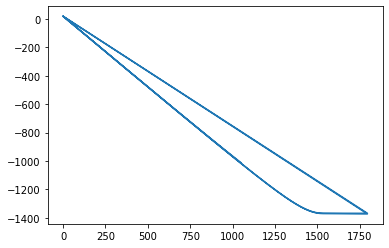

In [9]:
plt.plot(df["Arc Length (m)"], df["Z (m)"])

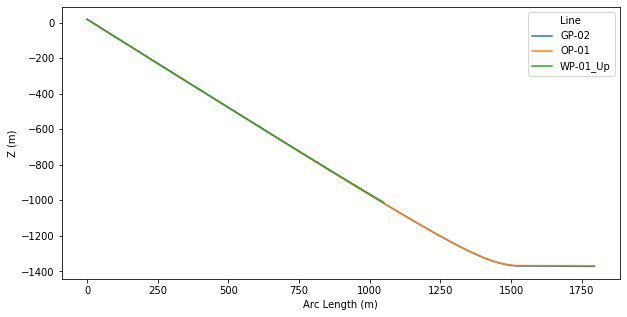

In [10]:

plt.figure(figsize=(10,5))
sns.lineplot(x="Arc Length (m)", y="Z (m)", data=df, hue="Line")

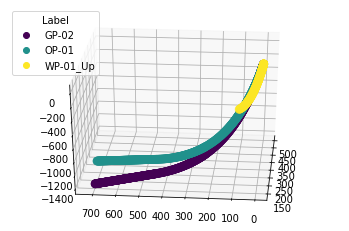

In [16]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u, df["Line_num"] = np.unique(df["Line"], return_inverse=True)
sc = ax.scatter(df['X (m)'], df['Y (m)'], df['Z (m)'], c=df["Line_num"], s=60)
ax.view_init(30, 185)
ax.legend(sc.legend_elements()[0], u, title="Label")
plt.show()

In [29]:
rdp([df["X (m)"],df["Y (m)"],df["Z (m)"]])

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [33]:
df["X (m)"],df["Y (m)"],df["Z (m)"]

(0       343.570000
 1       343.541591
 2       343.513177
 3       343.484754
 4       343.456320
            ...    
 1655    502.791007
 1656    504.179531
 1657    505.581299
 1658    506.996551
 1659    508.425442
 Name: X (m), Length: 1660, dtype: float64, 0         2.790000
 1         2.882382
 2         2.974851
 3         3.067467
 4         3.160268
            ...    
 1655    113.563466
 1656    114.558515
 1657    115.563055
 1658    116.577258
 1659    117.601235
 Name: Y (m), Length: 1660, dtype: float64, 0         17.845000
 1         16.816517
 2         15.788047
 3         14.759596
 4         13.731166
            ...     
 1655    -992.738789
 1656    -997.455214
 1657   -1002.165663
 1658   -1006.869965
 1659   -1011.567981
 Name: Z (m), Length: 1660, dtype: float64)

In [22]:
test = df[df["Line"]=="GP-02"]
test.drop(columns=["Arc Length (m)", "Line", "Line_num"], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
test

,X (m),Y (m),Z (m)
0,343.570000,2.790000,17.845000
1,343.541591,2.882382,16.816517
2,343.513177,2.974851,15.788047
3,343.484754,3.067467,14.759596
4,343.456320,3.160268,13.731166
...,...,...,...
698,139.626152,691.304371,-1372.100479
699,139.342119,692.263267,-1372.107514
700,139.058083,693.222171,-1372.113278
701,138.774043,694.181082,-1372.117208


In [36]:
test_out= rdp(test, epsilon=0.5)
len(test_out)

30

In [48]:
test_out

[[343.57, 2.789999999999916, 17.845000000000002],
 [340.51609995379926, 13.062340459499426, -87.74933431574696],
 [336.8830852494955, 25.32801677719522, -202.19583649717217],
 [333.27971939672193, 37.493593554092584, -306.5651222003764],
 [329.54886162391665, 50.08960481079553, -405.8199911088436],
 [325.68462283935906, 63.135933137867426, -499.94639927905405],
 [321.681532373297, 76.65104846634614, -588.9274355954361],
 [317.7899248768901, 89.78977838482949, -667.8196724874125],
 [313.5223975346366, 104.19767786546443, -746.4635168954399],
 [309.02630514574037, 119.37725205058214, -821.2226978805566],
 [304.61050762338743, 134.2857372756569, -887.3207062539142],
 [300.20116257769047, 149.17243807272786, -946.7634328329433],
 [295.3134675638724, 165.67413026659224, -1005.7357161269341],
 [290.31919717178624, 182.53563956003052, -1059.2281975010594],
 [285.2548234825082, 199.6338301102497, -1107.2080152257938],
 [280.222976085873, 216.6222070169391, -1149.2774273853138],
 [274.508544517

In [52]:
#OC format of points in excel
points=''
for index, i in enumerate(test_out):
    i = [ round(elem, 2) for elem in i ]
    if index==len(test_out)-1:
        points = points+str(i[0])+','+str(i[1])+','+str(i[2])
    else:
        points = points+str(i[0])+','+str(i[1])+','+str(i[2])+';'
print(points)

343.57,2.79,17.85;340.52,13.06,-87.75;336.88,25.33,-202.2;333.28,37.49,-306.57;329.55,50.09,-405.82;325.68,63.14,-499.95;321.68,76.65,-588.93;317.79,89.79,-667.82;313.52,104.2,-746.46;309.03,119.38,-821.22;304.61,134.29,-887.32;300.2,149.17,-946.76;295.31,165.67,-1005.74;290.32,182.54,-1059.23;285.25,199.63,-1107.21;280.22,216.62,-1149.28;274.51,235.92,-1191.0;269.54,252.68,-1222.56;264.36,270.19,-1251.32;258.96,288.41,-1277.15;253.37,307.27,-1299.88;247.64,326.63,-1319.35;241.83,346.25,-1335.48;235.54,367.49,-1349.17;229.32,388.46,-1359.12;225.54,401.23,-1363.54;221.67,414.31,-1366.81;218.3,425.7,-1368.67;214.32,439.11,-1369.74;138.49,695.14,-1372.12


In [15]:
def pointsToExcel(rdp_points):
    #OC format of points in excel
    points=''
    for index, i in enumerate(rdp_points):
        i = [ round(elem, 2) for elem in i ]
        if index==len(rdp_points)-1:
            points = points+str(i[0])+','+str(i[1])+','+str(i[2])
        else:
            points = points+str(i[0])+','+str(i[1])+','+str(i[2])+';'
    return points

In [55]:
#OC format of points in json
points_value=[]
for i in test_out:
    i = [ round(elem, 2) for elem in i ]
    points_value.append({"x":i[0],"y":i[1],"z":i[2]})
print(points_value)

[{'x': 343.57, 'y': 2.79, 'z': 17.85}, {'x': 340.52, 'y': 13.06, 'z': -87.75}, {'x': 336.88, 'y': 25.33, 'z': -202.2}, {'x': 333.28, 'y': 37.49, 'z': -306.57}, {'x': 329.55, 'y': 50.09, 'z': -405.82}, {'x': 325.68, 'y': 63.14, 'z': -499.95}, {'x': 321.68, 'y': 76.65, 'z': -588.93}, {'x': 317.79, 'y': 89.79, 'z': -667.82}, {'x': 313.52, 'y': 104.2, 'z': -746.46}, {'x': 309.03, 'y': 119.38, 'z': -821.22}, {'x': 304.61, 'y': 134.29, 'z': -887.32}, {'x': 300.2, 'y': 149.17, 'z': -946.76}, {'x': 295.31, 'y': 165.67, 'z': -1005.74}, {'x': 290.32, 'y': 182.54, 'z': -1059.23}, {'x': 285.25, 'y': 199.63, 'z': -1107.21}, {'x': 280.22, 'y': 216.62, 'z': -1149.28}, {'x': 274.51, 'y': 235.92, 'z': -1191.0}, {'x': 269.54, 'y': 252.68, 'z': -1222.56}, {'x': 264.36, 'y': 270.19, 'z': -1251.32}, {'x': 258.96, 'y': 288.41, 'z': -1277.15}, {'x': 253.37, 'y': 307.27, 'z': -1299.88}, {'x': 247.64, 'y': 326.63, 'z': -1319.35}, {'x': 241.83, 'y': 346.25, 'z': -1335.48}, {'x': 235.54, 'y': 367.49, 'z': -1349.

## Task 2 - Autocad list parsing

In [5]:
# maybe apply something like https://stackoverflow.com/questions/47982949/how-to-parse-complex-text-files-using-python



In [6]:
fname = 'list-sample.log'
with open(fname) as f:
#     _ = f.readline()
    content = f.readlines()[1:]
#     content = f.read()
# print(content)

In [7]:
layers = []
for line in content:
    if "Layer" in line:
        layers.append(line)

In [8]:
set(layers)

{'                  ARC       Layer: "Hatch"\n',
 '                  BLOCK REFERENCE  Layer: "0"\n',
 '                  BLOCK REFERENCE  Layer: "As-Laid Track_GP01_Riser"\n',
 '                  BLOCK REFERENCE  Layer: "Phantom"\n',
 '                  BLOCK REFERENCE  Layer: "Structures As-Built"\n',
 '                  BLOCK REFERENCE  Layer: "WJ"\n',
 '                  BLOCK REFERENCE  Layer: "WJ1"\n',
 '                  BLOCK REFERENCE  Layer: "WJ2"\n',
 '                  BLOCK REFERENCE  Layer: "dim"\n',
 '                  BLOCK REFERENCE  Layer: "equi"\n',
 '                  CIRCLE    Layer: "As-built UM01 080308"\n',
 '                  CIRCLE    Layer: "DEFPOINTS"\n',
 '                  CIRCLE    Layer: "DROP CORE 1"\n',
 '                  CIRCLE    Layer: "MIDLINE CONNECTION PP-03"\n',
 '                  CIRCLE    Layer: "PLET 083108"\n',
 '                  CIRCLE    Layer: "Phantom"\n',
 '                  CIRCLE    Layer: "Structures As-Built"\n',
 '               

In [9]:
# this works but written in python 2 so used to run manually 
import os
import sys
import re

point_regex = re.compile('(.*)\s+point,?\s+X=\s*(\d+\.?\d*)\s+Y=\s*(\d+\.\d*)\s+Z=\s*(\d+\.?\d*)')

class LayerReader:

    def __init__(self, infile):
        self.infile = infile
        self.fh = open(self.infile)
        self._stack = []

    def __iter__(self):
        return self
    
    def next(self):
        if self.fh.closed:
            raise StopIteration

        for line in self.fh:
            # Remove ^M at the end of each file
            line = line.replace(r'\r','').strip()
            if len(line) == 0: continue
            self._stack.append(line)
            if 'Layer: ' in line:
                record = self._stack[:-1]
                self._stack = [self._stack[-1]]
                #return record
                if 'Layer:' in record[0]:
                    return Layer(record)
                else:
                    continue
        
        record = self._stack
        print(record)
        self.fh.close()
        return Layer(record)
        
class Layer:

    def __init__(self,record):
        self._record = record
        self.handle = self._getHandle()
        self.layer_type, self.layer_name = self._getLayer()
        self.pointLst = self._getPoints()

    def _getHandle(self):
        for r in self._record:
            if 'Handle =' in r:
                ret = r.replace('Handle = ','')
                return ret

    def _getLayer(self):
        l = self._record[0]
        (layer_type, layer_name) = l.split(' Layer: ')
        layer_name = layer_name.replace('"','')
        layer_type = layer_type.strip()
        return (layer_type, layer_name)

    def _getPoints(self):
        ret = []
        for l in self._record:
            if ' point' in l:
                z = Point(l)
                ret.append(z)
        return ret

class Point:

    def __init__(self, line):
        try:
            self.what, self.X, self.Y, self.Z = point_regex.search(line).groups()
        except AttributeError:
            print >> sys.stderr, 'Duude: "%s"' % (line,)
            raise

def print_details(input_file):
    for layer in LayerReader(input_file):
        print ('\nHandle: %s' % (layer.handle,))
        print ('Layer Name: %s' % (layer.layer_name,))
        print ('Layer Type: %s' % (layer.layer_type,))
        for i, point in enumerate(layer.pointLst):
            print ('  %2d: %s: X = %s Y = %s Z = %s' % (i+1, point.what, point.X, point.Y, point.Z))

#class 

def print_table(input_file):

    for i, layer in enumerate(LayerReader(input_file)):
        if i == 0:
            header = ['Handle', 'Layer Name', 'Layer Type', 'No', 'Wtf', 'X', 'Y', 'Z']
            print ('\t'.join(header))
        layer_out = [layer.handle, layer.layer_name, layer.layer_type]
        for i, point in enumerate(layer.pointLst):
            line_out = []
            line_out.extend(layer_out)
            line_out.extend([str(i+1),point.what,point.X,point.Y,point.Z])
            print ('\t'.join(line_out))

In [10]:
print_table("siakap kikeh for OC_1f3801845.log")

TypeError: iter() returned non-iterator of type 'LayerReader'

## Autocad POSTPROCESSING

In [15]:
# df = pd.read_csv("MOM-K-56-PL-DW-5003-01 REV Z0_Overall Field Layout_ASB -  for oc_1e56c9f24.logout.csv")
df = pd.read_csv("Kikeh Field 2014_Ref dw Timb48_database_18_Dec_2013 _[BA24.05.17BOTTOM HOLE LOCATION BASE H120] for OC_1f72b41c6.logout.csv")
df

,Handle,Layer Name,Layer Type,Block name,Block rotation,No,Wtf,X,Y,Z
0,2358c0,New Proposed 6Feb,BLOCK REFERENCE,s-rbp-et3 WI EP,0.0,1,at,201049.4762,651006.4566,0.0
1,23588f,New Proposed 6Feb,BLOCK REFERENCE,s-rbp-su1,0.0,1,at,200219.7688,651206.4002,0.0
2,235883,HFL UTH1 to SU1 RBGL MDermot,BLOCK REFERENCE,sja01,0.0,1,at,200235.6078,651262.6262,0.0
3,235876,HFL UTH1 to SU1 RBGL MDermot,BLOCK REFERENCE,s-rbp-m1,0.0,1,at,200159.6349,651221.3498,0.0
4,235856,HFL UTH1 to SU1 RBGL MDermot,BLOCK REFERENCE,s-rbp-uth2,0.0,1,at,200227.5778,651226.0762,0.0
...,...,...,...,...,...,...,...,...,...,...
24420,21bfea,SPAR_Mooring Line_Extended,LWPOLYLINE,NaN,NaN,2,at,201471.7630,649135.9754,0.0
24421,145a79,mooring lines,LINE,NaN,NaN,1,from,200324.0000,650271.0000,0.0
24422,145a79,mooring lines,LINE,NaN,NaN,2,to,199902.5372,648698.9534,0.0
24423,145a78,SPAR_Mooring Line_Extended,LINE,NaN,NaN,1,from,201438.1330,649143.8950,0.0


In [16]:
# define the project location and substract the values from XY
projectLocation = (df[df["Block name"]== 'fpso'].X.values[0],df[df["Block name"]== 'fpso'].Y.values[0])
print (projectLocation)
df.X=round(df.X-projectLocation[0],2)
df.Y=round(df.Y-projectLocation[1],2)
df

(200324.0024, 650270.9825)


,Handle,Layer Name,Layer Type,Block name,Block rotation,No,Wtf,X,Y,Z
0,2358c0,New Proposed 6Feb,BLOCK REFERENCE,s-rbp-et3 WI EP,0.0,1,at,725.47,735.47,0.0
1,23588f,New Proposed 6Feb,BLOCK REFERENCE,s-rbp-su1,0.0,1,at,-104.23,935.42,0.0
2,235883,HFL UTH1 to SU1 RBGL MDermot,BLOCK REFERENCE,sja01,0.0,1,at,-88.39,991.64,0.0
3,235876,HFL UTH1 to SU1 RBGL MDermot,BLOCK REFERENCE,s-rbp-m1,0.0,1,at,-164.37,950.37,0.0
4,235856,HFL UTH1 to SU1 RBGL MDermot,BLOCK REFERENCE,s-rbp-uth2,0.0,1,at,-96.42,955.09,0.0
...,...,...,...,...,...,...,...,...,...,...
24420,21bfea,SPAR_Mooring Line_Extended,LWPOLYLINE,NaN,NaN,2,at,1147.76,-1135.01,0.0
24421,145a79,mooring lines,LINE,NaN,NaN,1,from,-0.00,0.02,0.0
24422,145a79,mooring lines,LINE,NaN,NaN,2,to,-421.47,-1572.03,0.0
24423,145a78,SPAR_Mooring Line_Extended,LINE,NaN,NaN,1,from,1114.13,-1127.09,0.0


In [17]:
# the same project location should be applied to the seabed
inputfile = "kikeh-seabed-utm-250m.csv"
subx = projectLocation[0]
suby = projectLocation[1]
outputfile = str(inputfile)+'_origin_'+str(subx)+'_'+str(suby)+'.csv'
with open(inputfile, 'r') as f_input: 
    reader = csv.reader(f_input, delimiter=',')
    with open(outputfile, 'w') as result:
        writer = csv.writer(result, delimiter=',')
        for row in reader:
            writer.writerow([float(row[0])-subx,float(row[1])-suby,float(row[2])])
projectLocation


(200324.0024, 650270.9825)

In [18]:
from tqdm import tqdm
df.dtypes, df["Layer Type"].unique()


(Handle             object
 Layer Name         object
 Layer Type         object
 Block name         object
 Block rotation    float64
 No                  int64
 Wtf                object
 X                 float64
 Y                 float64
 Z                 float64
 dtype: object,
 array(['BLOCK REFERENCE', 'LWPOLYLINE', 'CIRCLE', 'LINE', 'SOLID',
        'ATTRIBUTE', 'TEXT', 'ARC', 'DIMENSION'], dtype=object))

In [19]:
lt_uni=df["Layer Type"].unique() 
lout=[]
bout=[]
for lt in tqdm(lt_uni):
    _df=df[df["Layer Type"]==lt]
    if lt=="LWPOLYLINE":
        h_uni=_df["Handle"].unique()
        for h in (h_uni):
            _line = _df[_df["Handle"]==h]
#             if len(_line)>5:
            points = rdp(_line[["X","Y","Z"]], epsilon=0.5)
            points = pointsToExcel(points)
            lname=_line["Layer Name"].iloc[0]
#             print(f"processed {lname}")
            lout.append([lname,points])
    elif lt=="VERTEX":
        h_uni=_df["Layer Name"].unique()
        for h in h_uni:
            _line = _df[_df["Layer Name"]==h]
#             if len(_line)>5:
            points = rdp(_line[["X","Y","Z"]], epsilon=0.5)
            points = pointsToExcel(points)
            lname=_line["Layer Name"].iloc[0]
    #             print(f"processed {lname}")
            lout.append([lname,points])
#             print(out)
    elif lt=="BLOCK REFERENCE":
        h_uni=_df["Handle"].unique()
        for h in h_uni:
            _block=_df[_df["Handle"]==h]
            point = ','.join([str(_block.X.values[0]),str(_block.Y.values[0]),str(_block.Z.values[0])])
            bname = (_block["Layer Name"].values[0])
            bout.append([bname, _block["Block name"].values[0],_block["Block rotation"].values[0],point])
            

 11%|█         | 1/9 [00:01<00:08,  1.09s/it]


NameError: name 'pointsToExcel' is not defined

In [304]:
l_df = pd.DataFrame(lout)
l_df.columns=["Name", 'Points (x,y,z) (m)']
l_df.sort_values("Name",ascending=True, inplace=True)
l_df.reset_index(inplace=True)
l_df.drop(columns=['index'], inplace=True)
# l_df.Name.unique()
ll_df=pd.DataFrame()
# ll_df.columns=["Name", 'Points (x,y,z) (m)']
for l in tqdm(l_df.Name.unique()):
    _df=l_df[l_df["Name"]==l]
    if len(_df)>1:
        i=1
        for index, row in _df.iterrows():
            row.Name=row.Name+' '+ str(i)
            i+=1
    ll_df=pd.concat([ll_df, _df])
ll_df.index=ll_df.index+5000
ll_df["ParentId"]=""
ll_df["Asset type"]=""
ll_df["Status"]="Existing"
ll_df["Template name"]="flexible line"
ll_df=ll_df[["ParentId", "Name", "Asset type", "Template name", "Status", "Points (x,y,z) (m)"]]
ll_df



  0%|          | 0/143 [00:00<?, ?it/s]

 20%|██        | 29/143 [00:00<00:00, 286.68it/s]

 45%|████▍     | 64/143 [00:00<00:00, 301.22it/s]

 66%|██████▌   | 94/143 [00:00<00:00, 297.06it/s]

 82%|████████▏ | 117/143 [00:00<00:00, 269.97it/s]

100%|██████████| 143/143 [00:00<00:00, 267.46it/s]


,ParentId,Name,Asset type,Template name,Status,"Points (x,y,z) (m)"
5000,,2013 EFL P5_PM3 1,,flexible line,Existing,"4734.3,9527.57,0.0;4730.3,9527.2,0.0;4728.52,9..."
5001,,2013 EFL P5_PM3 2,,flexible line,Existing,"4757.7,9470.96,0.0;4754.47,9475.77,0.0;4752.3,..."
5002,,2013 EFL P5_PM3 3,,flexible line,Existing,"4758.56,9468.67,0.0;4749.48,9460.91,0.0;4747.3..."
5003,,2013 EFL SU4 to UTH6 Mc Dermott,,flexible line,Existing,"4296.82,8634.36,0.0;4295.35,8634.91,0.0;4294.5..."
5004,,2013 HFL P5_PM3,,flexible line,Existing,"4713.89,9531.5,0.0;4705.41,9530.32,0.0;4697.48..."
...,...,...,...,...,...,...
5422,,geo_Cables_as-found 5,,flexible line,Existing,"4277.02,8632.97,0.0;4277.02,8632.97,0.0"
5423,,geo_Cables_as-found 6,,flexible line,Existing,"1810.08,4896.78,0.0;1816.19,4885.72,0.0;1831.8..."
5424,,geo_pipeline_exposed,,flexible line,Existing,"819.87,3683.3,0.0;887.32,3685.81,0.0;924.45,36..."
5425,,mooring lines 1,,flexible line,Existing,"1060.29,-1201.69,0.0;730.18,-2342.05,0.0"


In [305]:
l_df["Name"].value_counts()

EFL                                        25
HFL UTH1 to SU1 RBGL MDermot               23
INSTALLATION_FEAT_LINE_BRS                 19
EFL SU04-SU05 CN1                          19
HFL                                        16
                                           ..
As-Built 5in GL Flexible Riser 20022018     1
As-Laid HFL Thermoplastic P7 to PM4         1
2013_HFL SU06-WX14                          1
HFL SU08 to PX07                            1
EFL PSA SU8 to P7                           1
Name: Name, Length: 143, dtype: int64

In [1]:
l_df

NameError: name 'l_df' is not defined

In [306]:
b_df = pd.DataFrame(bout)

b_df.columns=["Layer", "Block", "4 Azimuth (deg)", 'Position (x,y,z) (m)']
b_df["Name"] = b_df.Layer +" "+ b_df.Block
b_df.sort_values("Name",ascending=True, inplace=True)
b_df.reset_index(inplace=True)
b_df.drop(columns=['index'], inplace=True)
# b_df.Name.unique()
b_df["Template name"]="OC-box"
bb_df=pd.DataFrame()
# ll_df.columns=["Name", 'Points (x,y,z) (m)']
for b in tqdm(b_df.Name.unique()):
    _df=b_df[b_df["Name"]==b]
    if len(_df)>1:
        i=1
        for index, row in _df.iterrows():
            _df.loc[index,"Name"]=row.Name+' '+str(i)
            i+=1
#         print(_df)
    bb_df=pd.concat([bb_df, _df])
bb_df.index=bb_df.index+100
bb_df["ParentId"]=""
bb_df["Asset type"]=""
bb_df["Status"]="Existing"
bb_df.loc[bb_df['Name'].str.contains(pat = 'plet'), 'Template name'] = 'OC-plet'
bb_df.loc[bb_df['Name'].str.contains(pat = 'ilt'), 'Template name'] = 'OC-ilt'
bb_df.loc[bb_df['Name'].str.contains(pat = 'manifold'), 'Template name'] = 'OC-manifold'
bb_df.loc[bb_df['Name'].str.contains(pat = 'Manifold'), 'Template name'] = 'OC-manifold'
bb_df.loc[bb_df['Name'].str.contains(pat = 'sdu'), 'Template name'] = 'OC-sdu'
bb_df.loc[bb_df['Name'].str.contains(pat = 'SDU'), 'Template name'] = 'OC-sdu'
bb_df.loc[bb_df['Name'].str.contains(pat = 'well'), 'Template name'] = 'OC-xmas'
bb_df.loc[bb_df['Name'].str.contains(pat = 'Well'), 'Template name'] = 'OC-xmas'
bb_df.loc[bb_df['Name'].str.contains(pat = ' xt'), 'Template name'] = 'OC-xmas'
bb_df.loc[bb_df['Name'].str.contains(pat = ' wx'), 'Template name'] = 'OC-xmas'
bb_df.loc[bb_df['Name'].str.contains(pat = ' wm'), 'Template name'] = 'OC-manifold'
bb_df.loc[bb_df['Name'].str.contains(pat = ' gm'), 'Template name'] = 'OC-manifold'
bb_df.loc[bb_df['Name'].str.contains(pat = 'fpso'), 'Template name'] = 'OC-fpso'
bb_df.loc[bb_df['Name'].str.contains(pat = 'xmt'), 'Template name'] = 'OC-xmas'
bb_df.loc[bb_df['Name'].str.contains(pat = 'XMT'), 'Template name'] = 'OC-xmas'
bb_df=bb_df[["ParentId", "Name", "Asset type", "Template name", "Status", "Position (x,y,z) (m)", "4 Azimuth (deg)"]]
bb_df



  0%|          | 0/93 [00:00<?, ?it/s]

 19%|█▉        | 18/93 [00:00<00:00, 167.60it/s]

 38%|███▊      | 35/93 [00:00<00:00, 166.51it/s]

 62%|██████▏   | 58/93 [00:00<00:00, 181.07it/s]

 78%|███████▊  | 73/93 [00:00<00:00, 168.74it/s]

100%|██████████| 93/93 [00:00<00:00, 168.67it/s]


,ParentId,Name,Asset type,Template name,Status,"Position (x,y,z) (m)",4 Azimuth (deg)
100,,0 A$C4871403D 1,,OC-box,Existing,"4737.43,9527.93,0.0",309.0
101,,0 A$C4871403D 2,,OC-box,Existing,"2450.5,6041.36,0.0",333.0
102,,0 A$C5E9F42F1 1,,OC-box,Existing,"4739.27,9429.19,0.0",187.0
103,,0 A$C5E9F42F1 2,,OC-box,Existing,"4790.0,9467.01,0.0",331.0
104,,0 A$C5E9F42F1 3,,OC-box,Existing,"4585.35,8964.29,0.0",163.0
...,...,...,...,...,...,...,...
285,,scale unknown2,,OC-box,Existing,"2449.53,6091.23,0.0",0.0
286,,scale unknown3,,OC-box,Existing,"2483.64,6059.47,0.0",0.0
287,,scale unknown4,,OC-box,Existing,"4691.51,9514.58,0.0",0.0
288,,scale unknown5,,OC-box,Existing,"4712.86,9499.24,0.0",0.0


In [307]:
# For this case only Autocad rotations adjustment TO BE CHECKED FOR THE NEXT
for index, b in list(bb_df.iterrows()):
    if b["Template name"]=="OC-ilt":
        bb_df.loc[index,"4 Azimuth (deg)"]=360-b["4 Azimuth (deg)"]+90
    else:
        bb_df.loc[index,"4 Azimuth (deg)"]=360-b["4 Azimuth (deg)"]
bb_df

,ParentId,Name,Asset type,Template name,Status,"Position (x,y,z) (m)",4 Azimuth (deg)
100,,0 A$C4871403D 1,,OC-box,Existing,"4737.43,9527.93,0.0",51.0
101,,0 A$C4871403D 2,,OC-box,Existing,"2450.5,6041.36,0.0",27.0
102,,0 A$C5E9F42F1 1,,OC-box,Existing,"4739.27,9429.19,0.0",173.0
103,,0 A$C5E9F42F1 2,,OC-box,Existing,"4790.0,9467.01,0.0",29.0
104,,0 A$C5E9F42F1 3,,OC-box,Existing,"4585.35,8964.29,0.0",197.0
...,...,...,...,...,...,...,...
285,,scale unknown2,,OC-box,Existing,"2449.53,6091.23,0.0",360.0
286,,scale unknown3,,OC-box,Existing,"2483.64,6059.47,0.0",360.0
287,,scale unknown4,,OC-box,Existing,"4691.51,9514.58,0.0",360.0
288,,scale unknown5,,OC-box,Existing,"4712.86,9499.24,0.0",360.0


In [308]:
from pandas import ExcelWriter
def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'sheet%s' % n)
        writer.save()

In [309]:
fname="kikeh_existing_elements2.xlsx"
save_xls([ll_df,bb_df], fname)

In [310]:
from openpyxl import load_workbook

structures_data = [
    ["Property Name",'','','',"templateName","status","position","azimuth"],
    ["Property Type Value",'','','',"string","string","vector","number"],
    ["Property Type",'','','',"Engineering","Engineering","Engineering","Engineering"],
    ["Unit",'','','','','','','','','']
]
lines_data = [
    ["Property Name",'','','',"templateName","status",'points'],
    ["Property Type Value",'','','',"string","string","vectorArray"],
    ["Property Type",'','','',"Engineering","Engineering","Engineering"],
    ["Unit",'','','','','','','']
]

wb = load_workbook(fname)
ws = wb.worksheets[0]
ws.insert_rows(1,amount=4)
ws.title="lines"
for ri,row_data in enumerate(lines_data):
    for ci, col_data in enumerate(row_data):
        ws.cell(row=ri+1,column=ci+1,value=col_data)

ws = wb.worksheets[1]
ws.insert_rows(1,amount=4)
ws.title="structures"
# Append 2 new Rows - Columns A - D
for ri, row_data in enumerate(structures_data):
    for ci, col_data in enumerate(row_data):
        ws.cell(row=ri+1,column=ci+1,value=col_data)
wb.save(fname)

# Generate random list of points 

In [189]:

import random
import math

# radius of the circle
circle_r = 10000
# center of the circle (x, y)
circle_x = 200299.86
circle_y = 650295.3
points=[]
for i in range(8):
    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = circle_r * math.sqrt(random.random())
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    points.append({"x":x,"y":y})
    print("Random point", (x, y))
print(points)

Random point (206296.9527757578, 657682.8670530164)
Random point (202557.4489255244, 645455.553816264)
Random point (198455.14420046695, 651861.8208408175)
Random point (193934.58392656007, 651183.4460390934)
Random point (209642.3801953793, 653593.2133599472)
Random point (198351.22075640113, 656818.1684505871)
Random point (201588.3121458395, 642270.2283016281)
Random point (200147.27761653907, 657405.0076307243)
[{'x': 206296.9527757578, 'y': 657682.8670530164}, {'x': 202557.4489255244, 'y': 645455.553816264}, {'x': 198455.14420046695, 'y': 651861.8208408175}, {'x': 193934.58392656007, 'y': 651183.4460390934}, {'x': 209642.3801953793, 'y': 653593.2133599472}, {'x': 198351.22075640113, 'y': 656818.1684505871}, {'x': 201588.3121458395, 'y': 642270.2283016281}, {'x': 200147.27761653907, 'y': 657405.0076307243}]


In [191]:
circle_r = 30
# center of the circle (x, y)
circle_x = 203156.38
circle_y = 656313.94
points=[]
for i in range(2):
    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = circle_r * math.sqrt(random.random())
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    points.append({"x":x,"y":y})
    print("Random point", (x, y))
print(points)

Random point (203135.78560293102, 656300.7403468702)
Random point (203159.1561956857, 656291.2172388003)
[{'x': 203135.78560293102, 'y': 656300.7403468702}, {'x': 203159.1561956857, 'y': 656291.2172388003}]
